# 1 MuSCAT2 analysis
# 1.1 Reduction of the M2 light curve from 18.12.2019

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from muscat2ta.transitanalysis import NP, TransitAnalysis as TA
from corner import corner
import seaborn as sb

In [39]:
ta = TA('toi00263.01', '181218', 0, [2,3,4,5], nlegendre=3, use_opencl=True, 
        npop=400, with_contamination=False, radius_ratio='chromatic')

In [40]:
ta.set_prior(1, NP(0.557 , 0.001))

In [41]:
ta.add_t14_prior(0.0355, 0.0069)

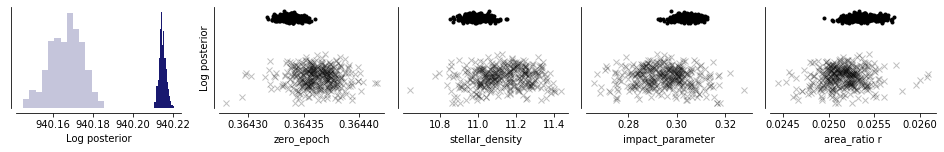

In [56]:
ta.optimize(1500)

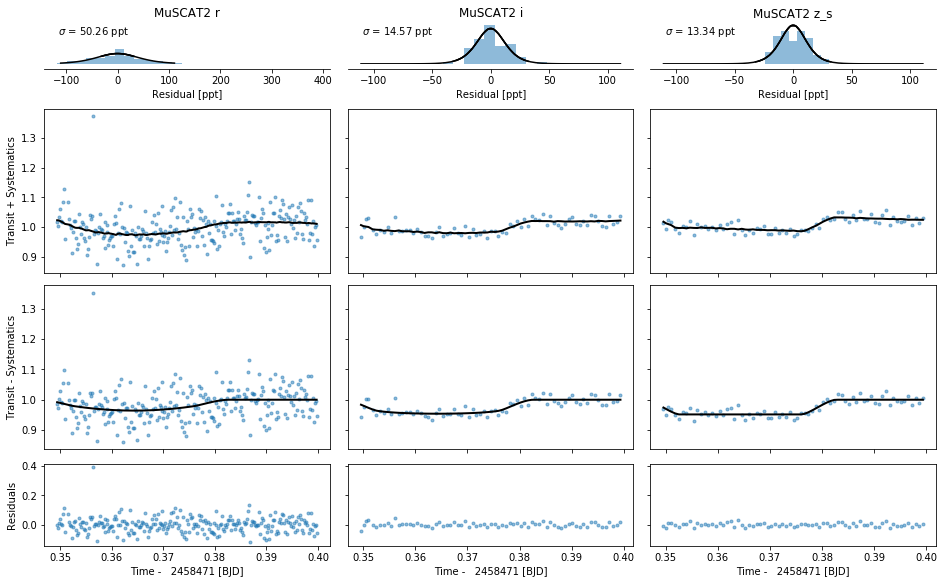

In [57]:
fig = ta.plot_light_curve()

In [58]:
ta.freeze_photometry()

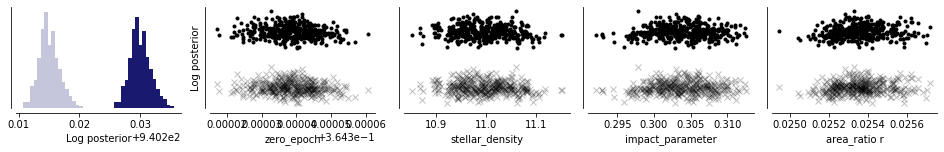

In [59]:
ta.optimize(500)

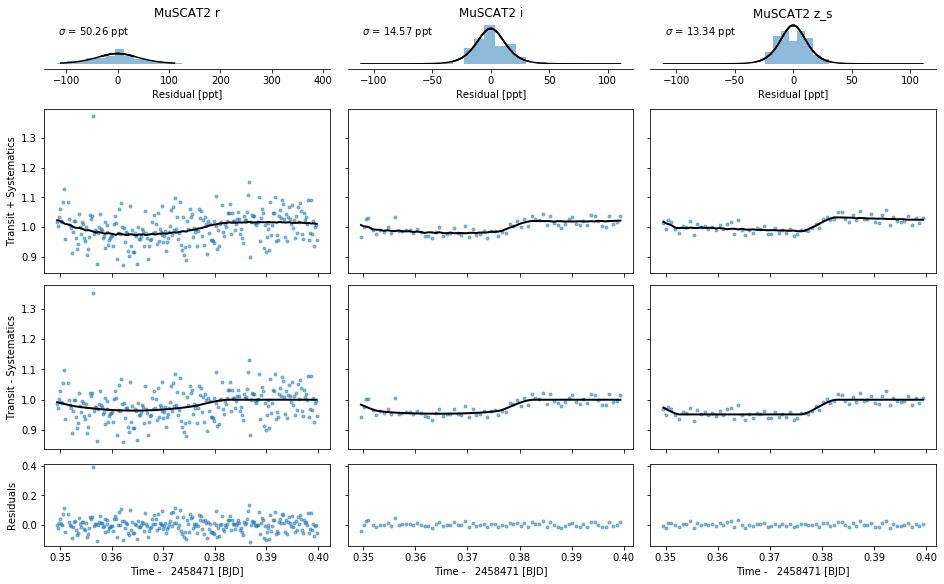

In [60]:
fig = ta.plot_light_curve(save=True)

In [75]:
ta.sample(4000, 40, repeats=2)

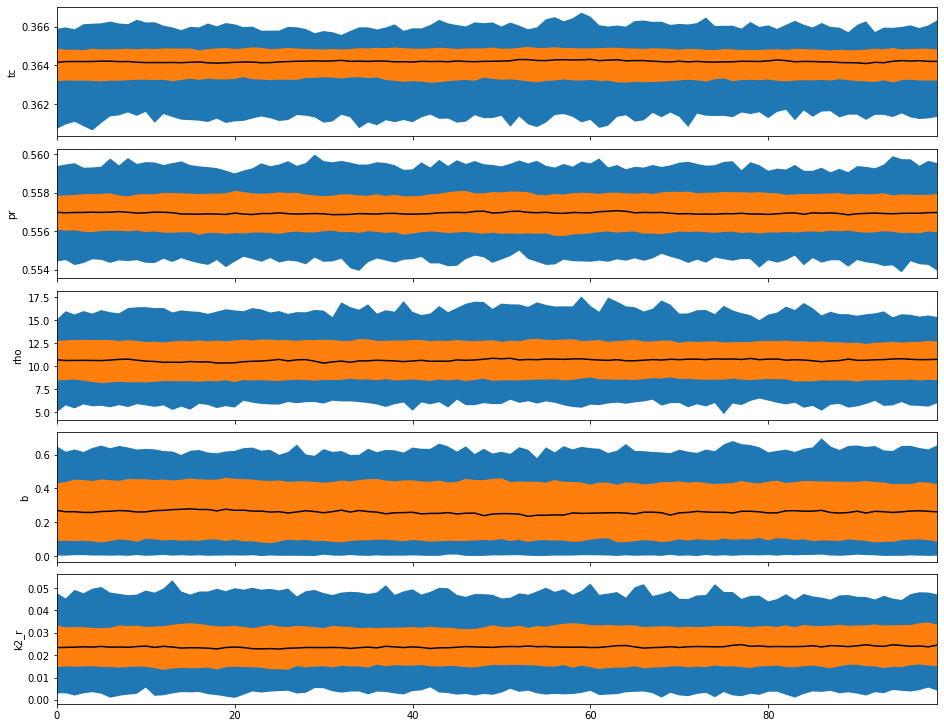

In [76]:
ta.lpf.plot_chains()

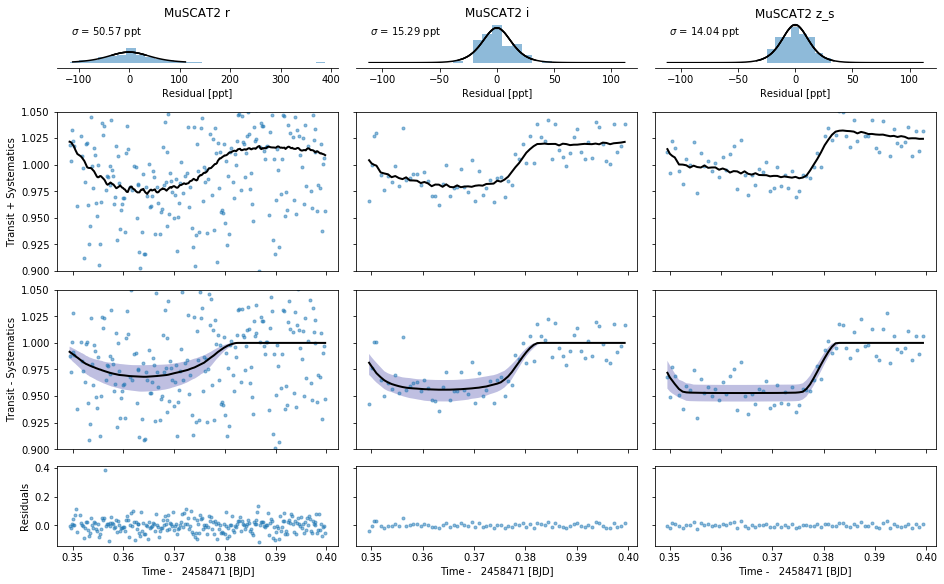

In [77]:
fig, axs = ta.lpf.plot_light_curves('mc')
setp(axs[1], ylim=(0.9,1.05));
setp(axs[2], ylim=(0.9,1.05));

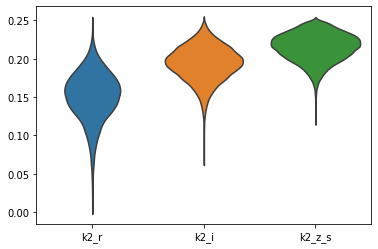

In [78]:
df = ta.posterior_samples()
sb.violinplot(data=sqrt(df.iloc[:,4:]), inner=None)

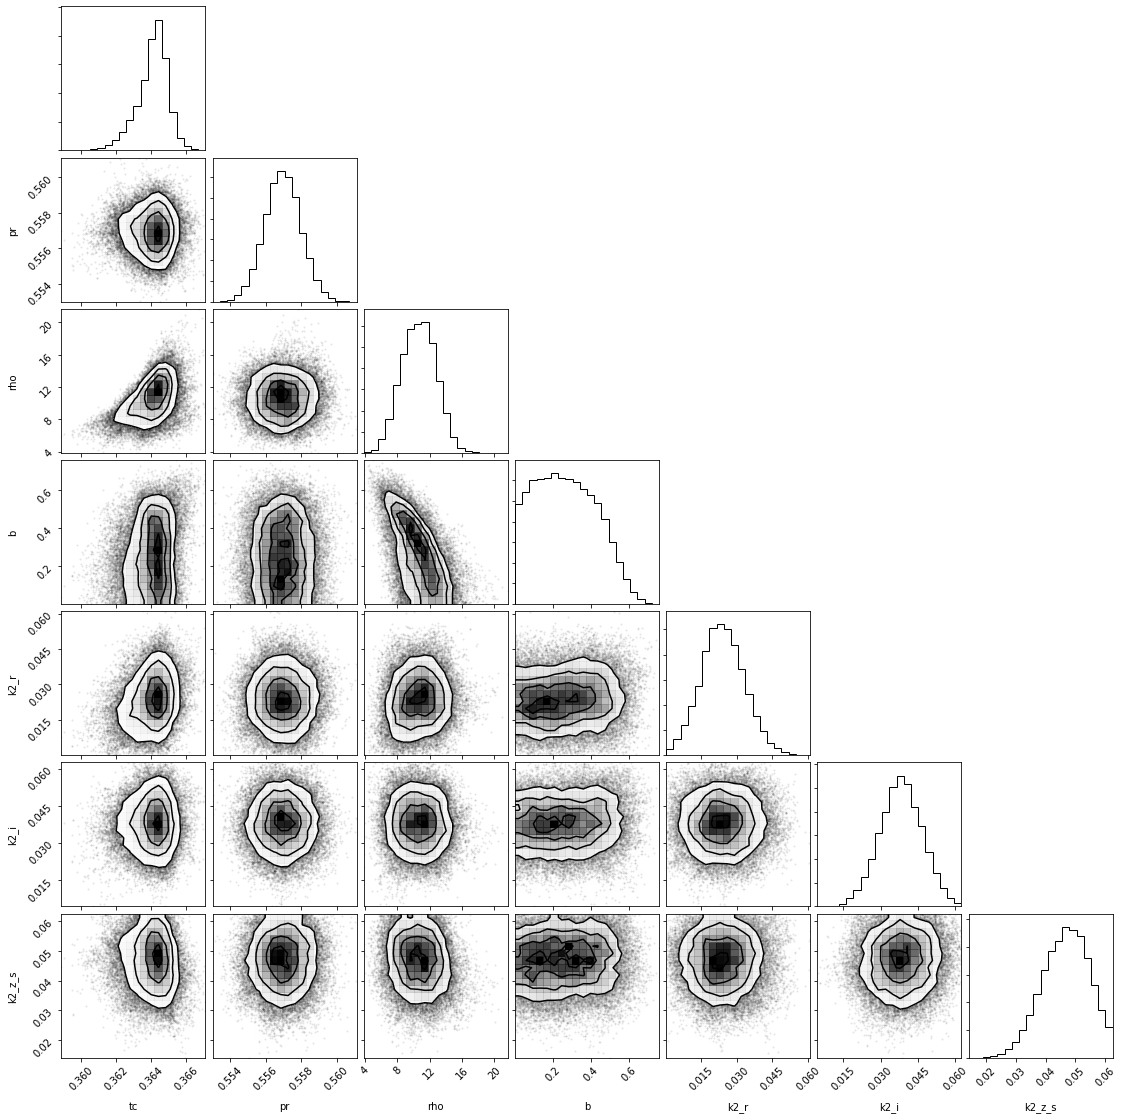

In [79]:
corner(df);

In [80]:
ta.save()
ta.pbs = ta.lpf.passbands
ta.save_fits()